In [1]:
# Importing Necessary Libraries
import pandas as pd        # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, interactive visualizations
import seaborn as sns      # For statistical data visualization based on Matplotlib
import geopandas as gpd     # For working with geospatial data
import folium               # For creating interactive maps
import plotly.express as px # For creating interactive visualizations easily

In [3]:
# Step 1: Load Data
temp_data = pd.read_csv('/content/temperature.csv')
bin_size_data = pd.read_csv('/content/BinSize.csv')

In [4]:
bin_size_data.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [5]:
bin_size_data.describe() #statistical measures

,LATITUDE,LONGITUDE,ELEVATION,WMOID,x,y
count,18259.000000,18259.000000,18259.000000,6171.000000,1.825900e+04,1.825900e+04
mean,36.862167,-54.090018,582.410685,58389.632799,-4.328554e+06,4.098892e+06
std,22.016258,81.612630,713.235554,26847.030026,6.932991e+06,2.448100e+06
min,-90.000000,-179.983000,-999.900000,1001.000000,-1.922509e+07,-1.000756e+07
25%,34.411800,-110.100000,88.000000,34318.000000,-8.820602e+06,3.826423e+06
50%,41.109200,-88.190600,281.000000,67315.000000,-7.363517e+06,4.571141e+06
75%,47.531100,5.226550,806.100000,74504.000000,3.517924e+05,5.285225e+06
max,82.516700,179.320000,4701.000000,98851.000000,1.970828e+07,9.175451e+06


In [6]:
# Getting info of the dataset
temp_data.info()
bin_size_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  

In [7]:
# Display the first five rows of the DataFrame
temp_data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [8]:
bin_size_data.isnull().sum()

,0
ID,0
LATITUDE,0
LONGITUDE,0
ELEVATION,0
STATE,5452
NAME,0
GSNFLAG,17332
HCNFLAG,16877
WMOID,12088
x,0


In [9]:
# Checking for null values
temp_data.isnull().sum()

,0
ID,0
Date,0
Element,0
Data_Value,0


# Q1 Line graph of record high and low temperatures (2005-2014):

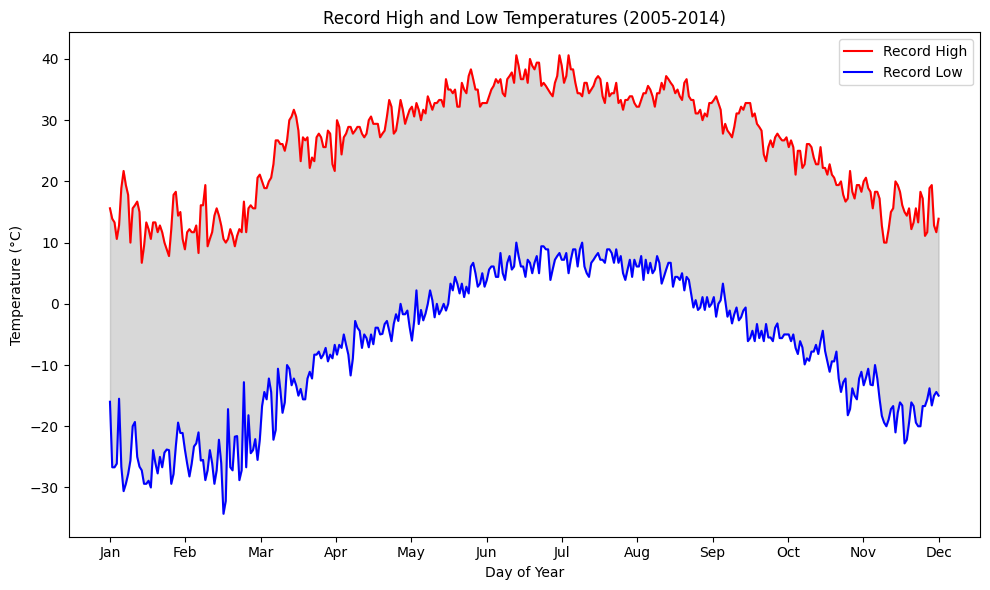

In [10]:
#Convert 'Date' to datetime and extract the year and day of year
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
temp_data['Year'] = temp_data['Date'].dt.year
temp_data['Day_of_Year'] = temp_data['Date'].dt.dayofyear

#Filter the data within the time range 2005-2014
data_2005_2014 = temp_data[(temp_data['Year'] >= 2005) & (temp_data['Year'] <= 2014)]

# Create a new column 'day_of_year' to represent the day of the year (ignoring leap years)
temp_data['day_of_year'] = temp_data['Date'].dt.strftime('%m-%d')

# Separate the TMAX and TMIN data
tmax_df = temp_data[temp_data['Element'] == 'TMAX']
tmin_df = temp_data[temp_data['Element'] == 'TMIN']

# Group by day_of_year and calculate the record high and low
record_highs = tmax_df.groupby('day_of_year')['Data_Value'].max()
record_lows = tmin_df.groupby('day_of_year')['Data_Value'].min()

# Convert temperatures from tenths of degrees Celsius to degrees Celsius
record_highs = record_highs / 10.0
record_lows = record_lows / 10.0

# Plot the record highs and lows
plt.figure(figsize=(10, 6))
plt.plot(record_highs.index, record_highs.values, color='red', label='Record High')
plt.plot(record_lows.index, record_lows.values, color='blue', label='Record Low')

# Shade the area
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='gray', alpha=0.3)

# Add labels and title
plt.title('Record High and Low Temperatures (2005-2014)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.xticks(np.linspace(0, 365, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Q2. Overlay 2015 data for broken records:

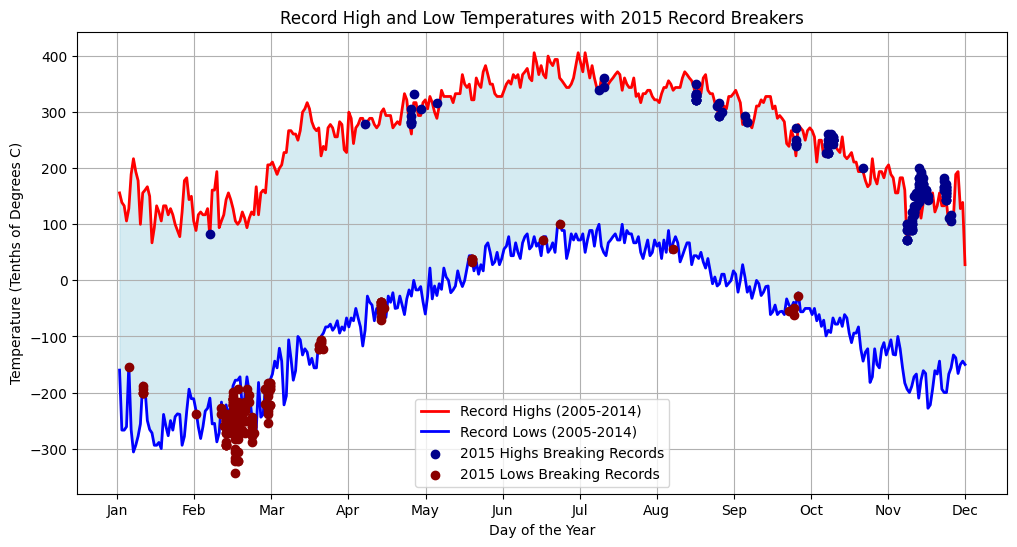

In [14]:
 #Extract records for 2005-2014
data_2005_2014 = temp_data[(temp_data['Date'].dt.year >= 2005) & (temp_data['Date'].dt.year <= 2014)]

# Calculate record highs and lows
record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby(data_2005_2014['Date'].dt.dayofyear)['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby(data_2005_2014['Date'].dt.dayofyear)['Data_Value'].min()

#  Prepare data for plotting
days_of_year = record_highs.index

# Extract and prepare the 2015 data
data_2015 = temp_data[temp_data['Date'].dt.year == 2015]
data_2015_highs = data_2015[data_2015['Element'] == 'TMAX']
data_2015_lows = data_2015[data_2015['Element'] == 'TMIN']

#Identify record-breaking highs and lows
breaking_highs = data_2015_highs[data_2015_highs['Data_Value'] > record_highs[data_2015_highs['Date'].dt.dayofyear].values]
breaking_lows = data_2015_lows[data_2015_lows['Data_Value'] < record_lows[data_2015_lows['Date'].dt.dayofyear].values]

# Plot the record highs and lows
plt.figure(figsize=(12, 6))
plt.plot(days_of_year, record_highs, label='Record Highs (2005-2014)', color='red', linewidth=2)
plt.plot(days_of_year, record_lows, label='Record Lows (2005-2014)', color='blue', linewidth=2)

#Shade the area between record highs and lows
plt.fill_between(days_of_year, record_highs, record_lows, color='lightblue', alpha=0.5)

# Step 10: Overlay scatter points for record-breaking temperatures in 2015
plt.scatter(breaking_highs['Date'].dt.dayofyear, breaking_highs['Data_Value'], color='darkblue', label='2015 Highs Breaking Records', zorder=5)
plt.scatter(breaking_lows['Date'].dt.dayofyear, breaking_lows['Data_Value'], color='darkred', label='2015 Lows Breaking Records', zorder=5)

# Step 11: Customize the plot
plt.title('Record High and Low Temperatures with 2015 Record Breakers')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.xticks(np.linspace(0, 366, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.xlim(0, 366)
plt.legend()
plt.grid()
plt.show()

# Q3. For leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

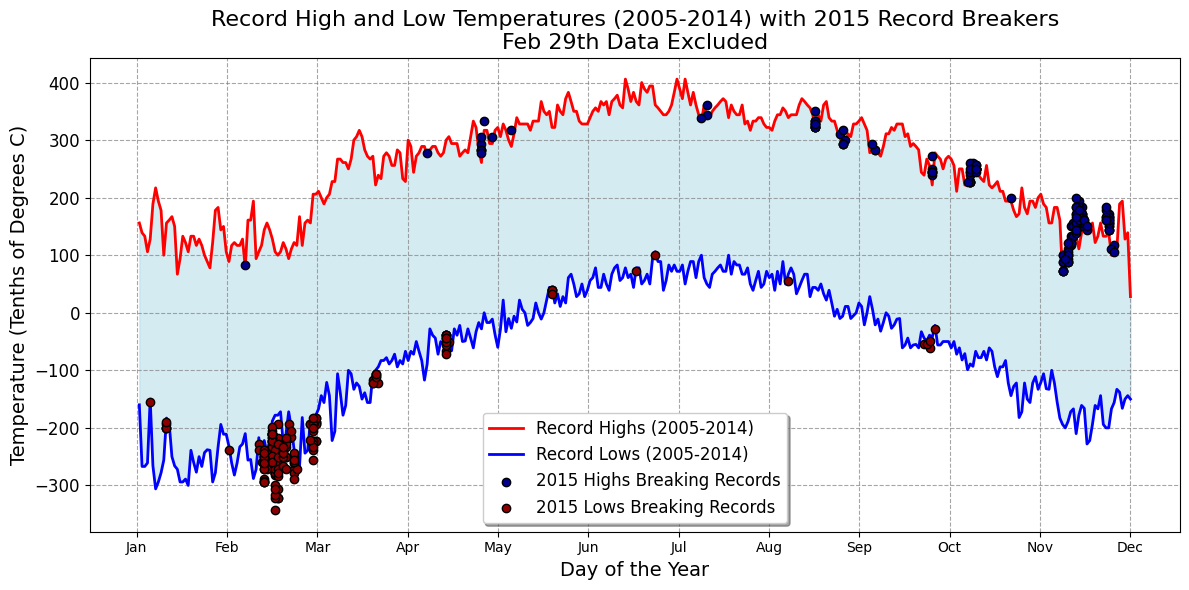

In [15]:
# Filter out leap days (February 29th) from 2015 data
data_2015 = data_2015[(data_2015['Date'].dt.month != 2) | (data_2015['Date'].dt.day != 29)]

# Extract highs and lows for 2015
data_2015_highs = data_2015[data_2015['Element'] == 'TMAX']
data_2015_lows = data_2015[data_2015['Element'] == 'TMIN']

# record-breaking highs and lows
breaking_highs = data_2015_highs[data_2015_highs['Data_Value'] > record_highs[data_2015_highs['Date'].dt.dayofyear].values]
breaking_lows = data_2015_lows[data_2015_lows['Data_Value'] < record_lows[data_2015_lows['Date'].dt.dayofyear].values]

# Plot the record highs and lows
plt.figure(figsize=(12, 6))
plt.plot(days_of_year, record_highs, label='Record Highs (2005-2014)', color='red', linewidth=2)
plt.plot(days_of_year, record_lows, label='Record Lows (2005-2014)', color='blue', linewidth=2)

# Step 12: Shade the area between record highs and lows
plt.fill_between(days_of_year, record_highs, record_lows, color='lightblue', alpha=0.5)

# Step 13: Overlay scatter points for record-breaking temperatures in 2015
plt.scatter(breaking_highs['Date'].dt.dayofyear, breaking_highs['Data_Value'], color='darkblue', label='2015 Highs Breaking Records', zorder=5, edgecolor='black')
plt.scatter(breaking_lows['Date'].dt.dayofyear, breaking_lows['Data_Value'], color='darkred', label='2015 Lows Breaking Records', zorder=5, edgecolor='black')

# Step 14: Customize the plot with better labels and titles
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Record Breakers\nFeb 29th Data Excluded', fontsize=16)
plt.xlabel('Day of the Year', fontsize=14)
plt.ylabel('Temperature (Tenths of Degrees C)', fontsize=14)
plt.xticks(np.linspace(0, 366, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(fontsize=12)

# Step 15: Customize the grid and legend
plt.grid(color='gray', linestyle='--', alpha=0.7)
plt.legend( fontsize=12, frameon=True, shadow=True)
plt.tight_layout()

# Step 16: Show the plot
plt.show()

# Visualizing stations on a map:

Interactive Mapping: Folium is used for visualizing data that’s been manipulated in Python on an interactive map, which makes it easier to visualize geographic data.
Usage in Project:Folium is utilized to plot weather station locations on a map, allowing users to see where data points are collected geographically.
Custom Markers and Layers: It allows for the customization of markers and layers on the map, which can include temperature data and other relevant information.

In [15]:
import pandas as pd
import folium

# Step 1: Load the station data
station_data = pd.read_csv('/content/BinSize.csv')


# Step 2: Create a map centered around Ann Arbor, Michigan
ann_arbor_coords = [42.2808, -83.7430]  # Latitude and Longitude of Ann Arbor
map_ann_arbor = folium.Map(location=ann_arbor_coords, zoom_start=10)

# Step 3: Add station markers to map
for _, row in station_data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"Station ID: {row['ID']}\nName: {row['NAME']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map_ann_arbor)

# Step 4: Display the map
map_ann_arbor.save('ann_arbor_stations_map.html')
map_ann_arbor


# 6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).


Combining the location data (latitude and longitude) from the station dataset with temperature data allows us to visualize temperature patterns geographically.

Involves creating an interactive map of weather stations near Ann Arbor, Michigan, with temperature summaries for the year 2015. Each weather station is marked on the map with details like the mean, maximum, and minimum temperatures displayed in a popup.

In [ ]:
# Step 1: Load the station and temperature datasets
station_data = pd.read_csv('/content/BinSize.csv')  # Station dataset
temp_data = pd.read_csv('/content/temperature.csv')  # Temperature dataset

# Step 2: Merge the datasets on 'Station ID'
merged_data = pd.merge(temp_data, station_data, how='left', on='ID')


In [ ]:
merged_data.head()

,ID,Date,Element,Data_Value,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,USW00094889,2014-11-12,TMAX,22,42.2228,-83.7444,255.7,MI,ANN ARBOR MUNI AP,NaN,NaN,NaN,-6.895857e+06,4.694968e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
1,USC00208972,2009-04-29,TMIN,56,42.4356,-83.7831,276.1,MI,WHITMORE LAKE 1NW,NaN,NaN,NaN,-6.875744e+06,4.718630e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
2,USC00200032,2008-05-26,TMAX,278,41.9164,-84.0158,231.6,MI,ADRIAN 2 NNE,NaN,HCN,NaN,-6.951679e+06,4.660898e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
3,USC00205563,2005-11-11,TMAX,139,41.9069,-83.4158,178.6,MI,MONROE,NaN,NaN,NaN,-6.903061e+06,4.659841e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
4,USC00200230,2014-02-27,TMAX,-106,42.2947,-83.7108,274.3,MI,ANN ARBOR U OF MICH,NaN,HCN,NaN,-6.885235e+06,4.702963e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...


In [15]:
import pandas as pd
import folium

# Step 1: Convert the 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Step 2: Filter for the year 2015
data_2015 = merged_data[merged_data['Date'].dt.year == 2015]

# Step 3: Pivot the data to have separate columns for 'TMAX' and 'TMIN'
data_pivoted = data_2015.pivot_table(index=['ID', 'LATITUDE', 'LONGITUDE', 'NAME', 'Date'],
                                     columns='Element',
                                     values='Data_Value').reset_index()

# Step 4: Calculate temperature summaries (mean, max, min) for each station
temp_summary = data_pivoted.groupby(['ID', 'LATITUDE', 'LONGITUDE', 'NAME']).agg({
    'TMAX': ['mean', 'max'],
    'TMIN': ['mean', 'min']
}).reset_index()

# Flatten the MultiIndex resulting from the aggregation
temp_summary.columns = ['ID', 'LATITUDE', 'LONGITUDE', 'NAME', 'TMAX_MEAN', 'TMAX_MAX', 'TMIN_MEAN', 'TMIN_MIN']

# Step 5: Create a map centered around Ann Arbor, Michigan
ann_arbor_coords = [42.2808, -83.7430]  # Ann Arbor latitude and longitude
map_ann_arbor = folium.Map(location=ann_arbor_coords, zoom_start=10)

# Step 6: Plot each station on the map with temperature information in the popup
for _, row in temp_summary.iterrows():
    popup_info = f"Station ID: {row['ID']}<br>" \
                 f"Name: {row['NAME']}<br>" \
                 f"Mean Max Temp: {row['TMAX_MEAN']:.2f} °F<br>" \
                 f"Max Temp: {row['TMAX_MAX']:.2f} °F<br>" \
                 f"Mean Min Temp: {row['TMIN_MEAN']:.2f} °F<br>" \
                 f"Min Temp: {row['TMIN_MIN']:.2f} °F"

    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=popup_info,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_ann_arbor)

# Step 7: Save the map to an HTML file
map_ann_arbor.save('ann_arbor_temperature_summary_2015.html')

map_ann_arbor


 Interactive heatmap visualizing the distribution of average temperatures recorded by weather stations near Ann Arbor in 2015. The heatmap uses a color gradient (blue to red) to represent temperature intensity, offering a visual representation of how temperatures varied across the region.

In [15]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Sample temperature data for 2015 near Ann Arbor, Michigan, with multiple stations
data = {
    'Date': ['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
             '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
             '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
             '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08'],
    'TMAX': [30, 32, 28, 25, 35, 36, 24, 23, 85, 90, 88, 92, 95, 93, 89, 87],
    'TMIN': [10, 12, 8, 5, 15, 16, 4, 3, 60, 65, 62, 66, 70, 68, 64, 61],
    'LATITUDE': [42.2808, 42.2908, 42.2508, 42.3108, 42.2808, 42.2708,
                 42.2808, 42.2608, 42.2808, 42.2908, 42.2508, 42.3108,
                 42.2808, 42.2708, 42.2808, 42.2608],  # Example latitudes for multiple stations
    'LONGITUDE': [-83.7430, -83.7400, -83.7500, -83.7600, -83.7430, -83.7400,
                  -83.7430, -83.7400, -83.7430, -83.7400, -83.7500, -83.7600,
                  -83.7430, -83.7400, -83.7430, -83.7400]  # Example longitudes for multiple stations
}

# Load data into a DataFrame
merged_data = pd.DataFrame(data)

# Convert 'Date' to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Calculate average temperature for the day
merged_data['Avg_Temp'] = (merged_data['TMAX'] + merged_data['TMIN']) / 2

# Remove rows with NaN values (if any)
merged_data = merged_data.dropna(subset=['Avg_Temp'])

# Create a base map centered around Ann Arbor, Michigan
map_ann_arbor = folium.Map(location=[42.2808, -83.7430], zoom_start=10)

# Prepare data for the heatmap: use average temperature
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['Avg_Temp']] for index, row in merged_data.iterrows()]

# Define a gradient for low, medium, and high temperatures
gradient = {
    0: 'blue',      # Low temperature
    0.5: 'lime',    # Medium temperature
    1: 'red'        # High temperature
}

# Add the HeatMap layer
HeatMap(heat_data, radius=15, gradient=gradient).add_to(map_ann_arbor)

# Save the map to an HTML file
map_ann_arbor.save('all_stations_average_temperature_heatmap_2015.html')

# Display the map if using a Jupyter Notebook
map_ann_arbor
